In [30]:
import numpy as np

###  numpy中的矩阵乘法测试

In [31]:
a=np.array([[1,2,3],[2,3,4],[5,6,7]])
print(a)

[[1 2 3]
 [2 3 4]
 [5 6 7]]


In [32]:
b=np.array([1,2,3])
b

array([1, 2, 3])

In [33]:
b*a

array([[ 1,  4,  9],
       [ 2,  6, 12],
       [ 5, 12, 21]])

In [34]:
a*b

array([[ 1,  4,  9],
       [ 2,  6, 12],
       [ 5, 12, 21]])

### 第一章  感知机

In [35]:
def AND(x1,x2):
    w1,w2,theta=0.5,0.5,0.7
    tmp=x1*w1+x2*w2
    if tmp<=theta:
        return 0
    elif tmp>theta:
        return 1

In [36]:
AND(0,0)

0

用numpy进行感知机的实现

In [37]:
#与门
def ADN(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.7
    tmp=np.sum(x*w)+b
    if tmp<=0:
        return 0
    elif tmp>0:
        return 1
    pass
#与非门
def NAND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])
    b=0.7
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0
    elif tmp>0:
        return 1
    pass
#或门
def OR(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.2
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0
    else:
        return 1
    pass


In [38]:
#异或门
def XOR(x1,x2):
    s1=NAND(x1,x2)
    s2=OR(x1,x2)
    y=AND(s1,s2)
    return y

In [39]:
print(XOR(1,1))
print(XOR(1,0))

0
1


## 第二章 神经网络

#### 阶跃函数的实现

In [40]:
def step_function0(x):
    y=x>0
    return y.astype(np.int)

In [41]:
#解释上面的技巧
x=np.array([-1,1,2])
y=x>0#将x中的元素转为布尔值，大于零为1
y=y.astype(int)#将 y元素类型从bool型变为int型
y


array([0, 1, 1])

In [42]:

import matplotlib.pylab as plt 


In [43]:
#更加简单的阶跃函数定义
def step_function(x):
    return np.array(x>0,dtype=int)


(-0.1, 1.1)

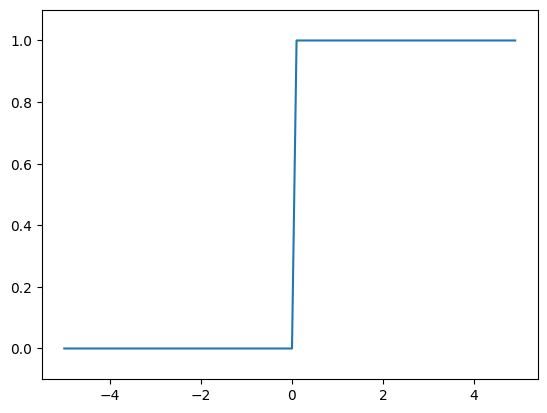

In [44]:
x=np.arange(-5,5,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)#确定y轴范围

### sigmoid函数的实现

In [45]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [46]:
x=np.array([-1,0,1])
sigmoid(x)

array([0.26894142, 0.5       , 0.73105858])

(-0.1, 1.0)

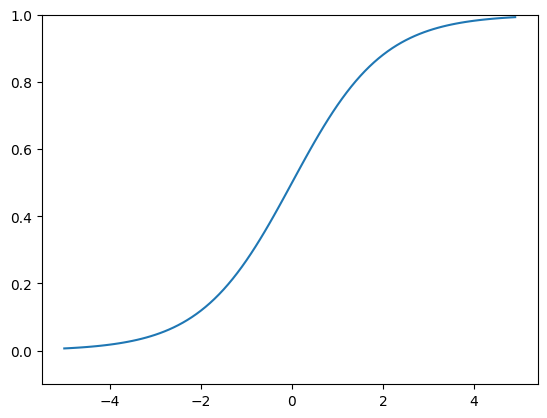

In [47]:
x=np.arange(-5,5,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1,1)

In [48]:
#矩阵的乘法
a=np.array([[1,2,3],[4,5,6]])
b=np.array([1,2])
np.dot(b,a
       )

array([ 9, 12, 15])

In [49]:
def identify_function(x):
    return x

In [50]:
#三层神经网络的代码实现
def init_network():
    '''
    保存了每一层的权重和偏置
    '''
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])
    return network
def forward(network,x):
    '''
    将输入信号转为输出信号
    '''
    W1, W2, W3=network['W1'],network['W2'],network['W3']
    b1, b2, b3=network['b1'],network['b2'],network['b3']
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=identify_function(a3)
    return y
network=init_network()
x=np.array([1,0.5])
y=forward(network,x)
y


array([0.31682708, 0.69627909])

In [51]:
#softmax
def softmax0(a):
    exp_a=np.exp(a)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y 


为了防止指数运算出现很大的溢出值，就指数减去最大的a，不改变值的大小

In [52]:
#改善softmax
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y


### 手写数字识别
pycharm 上面实行

### 第四章 神经网络的学习

In [53]:
def mean_squared_error(y,t):
    '''
    均方误差函数
    :param y: 神经网络输出
    :param t: 监督数据
    :return:
    '''
    return 0.5*np.sum((y-t)**2)

In [54]:
#设“2”为正确解
t=[0,0,1,0,0,0,0,0,0,0]#不是正确解的位置是0
#"2"的概率最高是0.6
y=[0.1,0.005,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
mean_squared_error(np.array(y),np.array(t))


0.09626250000000003

In [55]:
#例2 “7”的概率最高 0.6
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
mean_squared_error(np.array(y),np.array(t))

0.5975

In [56]:
#交叉熵误差
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))#加上一个常数，防止出现log0，导致后面无法计算
pass

### shape的使用
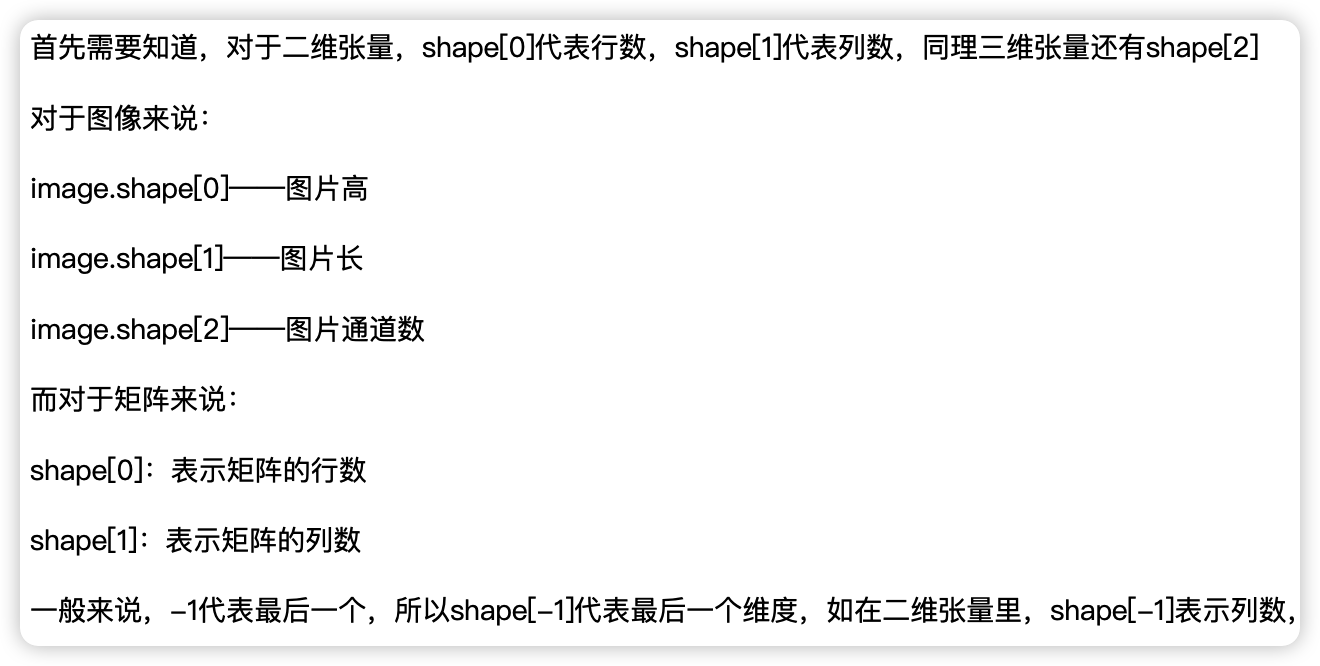

In [57]:
x=np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
i=y.shape[0]
ii=x.shape[0]
ii1=x.shape[1]
print(i,ii,ii1)
print(x)
print(x.size)#size 是总的元素个数

AttributeError: 'list' object has no attribute 'shape'

#### mini-batch版的交叉熵误差的实现

In [ ]:
def cross_entcopy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
        pass
    batch_size=y.shape[0]#找到行数
    return -np.sum(t*np.log(y+1e-7))/batch_size
def cross_entcopy_error1(y,t):
    '''
    监督数据 是标签形式（即 ‘2’，‘7’这种标签）
    '''
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
        pass
    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

#### 数值微分

In [ ]:
def numerical_diff(f,x):
    '''  
    求解微分值 
    f:函数
    x:坐标点
    '''
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)


In [ ]:
def function_2(x):
    return x[0]**2+x[1]**2

In [ ]:
#梯度
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x)
    for idx in range(x.size):
        i=x[idx]
        x[idx]=i+h#计算x+h
        fx1=f(x)

        x[idx]=i-h#计算x-h
        fx2=f(x)
        
        grad[idx]=(fx1-fx2)/(2*h)
        x[idx]=i#还原x的值
        pass
    return grad

In [ ]:
#测试梯度函数
numerical_gradient(function_2,np.array([3,4.]))

array([6., 8.])

In [ ]:
#实现梯度下降法
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x

    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr*grad#对高纬也适用
        pass
    return x

In [ ]:
#用梯度法求解 x1^2+x2^2 的最小值
init_x=np.array([-3.,4.])
gradient_descent(function_2,init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

## 第五章 误差反向传播法

#### 5.4 简单层的实现

In [ ]:
#乘法层的实现
class MulLayer:
    def __init__(self):
        self.x=None
        self.y=None#初始化实例变量x y ，保存正向传播时的输入值
        pass

    def forward(self,x,y):
        '''
        保存正向传播的输入值
        '''
        self.x=x
        self.y=y
        out=x*y
        return out
    
    def backward(self,dout):
        '''
        从上游传来的导数，乘以正向传播的反转值
        '''
        dx=dout*self.y
        dy=dout*self.x

        return dx , dy 

In [ ]:
#使用这个乘法层，计算购买苹果的例子
apple=100
apple_num=2
tax=1.1

mul_apple_layer=MulLayer()
mul_tax_layer=MulLayer()

#forward
apple_price=mul_apple_layer.forward(apple,apple_num)
price=mul_tax_layer.forward(apple_price,tax)
print(int(price))

220


In [ ]:
#加法层的实现
class AddLayer:
    def __init__(self) -> None:
        pass

    def forward(self,x,y):
        out=x+y
        return out
    
    def backward(self,dout):
        dx=dout*1
        dy=dout
        return dx , dy 
    

#### 5.5 激活函数层的实现


In [ ]:
#ReLU 
class Relu:
    def __init__(self) -> None:
        self.mask=None
        pass
    
    def forward(self,x):
        self.mask=(x<=0)
        out=x.copy()
        out[self.mask]=0
        return out 
    
    def backward(self,dout):
        dout[self.mask]=0
        dx=dout
        return dx



In [ ]:
#将所有的负元素 变为 0

x=np.array([[1,-0.5],[-2,3]])
print('x=',x)
mask=(x<=0)#新的写法
print('mask=',mask)
x[mask]=0
print('x=',x)

x= [[ 1.  -0.5]
 [-2.   3. ]]
mask= [[False  True]
 [ True False]]
x= [[1. 0.]
 [0. 3.]]


sigmoid 层

In [ ]:
#sigmoid 
class Sigmoid:
    def __init__(self) -> None:
        self.out=None
        pass

    def forward(self,x):
        out= 1/(1+np.exp(-x))
        self.out=out
        return out
    
    def backward(self,dout):
        dx=dout*(1-self.out)*self.out
        return dx
    

In [ ]:
#numpy 矩阵加法
x=np.array([[0,0,0],[10,10,10]])
b=np.array([1,2,3])
a=np.array([[1,2,3],[4,5,6]])
print('x+b',x+b)
print('x+a',x+a)

x+b [[ 1  2  3]
 [11 12 13]]
x+a [[ 1  2  3]
 [14 15 16]]


批版本的Affine层

In [ ]:
class Affine:
    def __init__(self,w,b) -> None:
        self.w=w
        self.b=b
        self.x=None
        self.dw=None
        self.db=None
        pass

    def forward(self,x):
        self.x=x
        out=np.dot(x,self.w)+self.b
        return out
    
    def backward(self,dout):
        dx=np.dot(dout,self.w.T)
        self.dw=np.dot(self.x.T,dout)
        self.db=np.sum(dout,axis=0)

        return dx
    

Soft-with-Loss层的实现

In [ ]:
class SoftmaxWithLoss:
    def __init__(self) -> None:
        self.loss=None
        self.y=None#softmax的输出
        self.t=None#监督数据
        pass
    
    def forward(self,x,t):
        self.t=t
        self.y=softmax(x)
        self.loss=cross_entcopy_error(self.y,self.t)
        pass

    def backward(self,dout=1):
        batch_size=self.t.shape[0]
        dx=(self.y-self.t)/batch_size
        return dx
    



In [ ]:
a=np.array([[1,2,3],[4,5,6]])
a.shape[0]

2

## 第6章 与学习有关的技巧
#### 参数的更新

SGD

In [ ]:
class SGD:
    def __init__(self,lr=0.01) -> None:
        self.lr=lr
        pass

    def update(self,params,grads):
        for key in params.keys():
            params[key]-=self.lr*grads[key]
            pass
        pass
    

Momentum

In [ ]:
class Momentum:
    def __init__(self,lr=0.01,momentum=0.9) -> None:
        self.lr=lr 
        self.momentum=momentum
        self.v=None
        pass

    def update(self,params,grads):
        if self.v is None:
            self.v={}
            for key, val in params.items():
                self.v[key]=np.zeros_like(val)
                pass
            pass
        for key in params.keys():
            self.v[key]=self.momentum*self.v[key]-self.lr*grads[key]
            params[key]+=self.v[key]

In [ ]:
np.zeros_like(2)

array(0)

# 第7章 CNN


### 7.4 卷积层和池化层的实现

In [65]:
x=np.random.rand(2,2,4,4)
x

array([[[[0.85495886, 0.92360237, 0.18619165, 0.59642037],
         [0.7466567 , 0.91005588, 0.64156606, 0.50715013],
         [0.61449966, 0.28196885, 0.99988509, 0.90972349],
         [0.1761666 , 0.84614764, 0.92019569, 0.41095124]],

        [[0.59262116, 0.21832722, 0.88741932, 0.02626289],
         [0.56558894, 0.89542201, 0.30345431, 0.34804003],
         [0.54690152, 0.98326207, 0.74611699, 0.80991924],
         [0.62813824, 0.42291628, 0.27618286, 0.45581557]]],


       [[[0.763084  , 0.64027936, 0.24778472, 0.51222507],
         [0.50658265, 0.40213549, 0.5659526 , 0.08686331],
         [0.08034454, 0.52110928, 0.15351549, 0.63110569],
         [0.06183053, 0.64863099, 0.55512929, 0.9241616 ]],

        [[0.37485191, 0.08691353, 0.44806672, 0.25449341],
         [0.37198568, 0.05115813, 0.76582521, 0.7976239 ],
         [0.97112924, 0.86710489, 0.3561529 , 0.97864665],
         [0.9355889 , 0.14316825, 0.27814248, 0.738893  ]]]])